## Comparison of density outcrops between control, -10 W/m2 and +10 W/m2 experiment

This notebook compares ocean's stratification between the control, -10 W/m2 and +10 W/m2 experiment along various longitudes.

In [1]:
import cartopy.crs as ccrs
import cosima_cookbook as cc
import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import cmocean as cm
from dask.distributed import Client
import matplotlib.path as mpath
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr

# Avoid the Runtime errors in true_divide encountered when trying to divide by zero
import warnings
warnings.filterwarnings('ignore', category = RuntimeWarning)
warnings.filterwarnings('ignore', category = ResourceWarning)
warnings.filterwarnings('ignore', category = BytesWarning)

# matplotlib stuff:
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib
from mpl_toolkits.mplot3d import axes3d
%matplotlib inline
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'
matplotlib.rcParams['lines.linewidth'] = 2.0

In [2]:
import logging
logger = logging.getLogger("distributed.utils_perf")
logger.setLevel(logging.ERROR)

In [3]:
from dask.distributed import Client
client = Client()
client

Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: /proxy/8787/status,
Dashboard: /proxy/8787/status,Workers: 4
Total threads: 16,Total memory: 64.00 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:33259,Workers: 4
Dashboard: /proxy/8787/status,Total threads: 16
Started: Just now,Total memory: 64.00 GiB
Comm: tcp://10.6.121.2:35495,Total threads: 4
Dashboard: /proxy/39093/status,Memory: 16.00 GiB
Nanny: tcp://127.0.0.1:42745,


In [4]:
db = '/scratch/x77/db6174/mom/archive/databases/025deg_jra55_ryf/cc_database_control.db'
session_cont = cc.database.create_session(db)

db = '/scratch/x77/db6174/mom/archive/databases/025deg_jra55_ryf/cc_database_flux_forced_vary_heat_uniform.db'
session_heat = cc.database.create_session(db)

session = [session_heat, session_cont, session_heat]
expt = ['025deg_jra55_ryf_fluxH_neg10W', '025deg_jra55_ryf_control', '025deg_jra55_ryf_fluxH_pos10W']

In [5]:
start_time = '2290-01-01'
end_time = '2295-12-31'

In [6]:
ncoarse = 12

x_min = [-100, -250]
x_max = [ 10 , -100]
y_min = [ 20 ,  20 ]
y_max = [ 75 ,  75 ]
basin = ['NA', 'NP']

In [7]:
potrho_cont = cc.querying.getvar(expt[1], 'pot_rho_2', session = session[1], start_time = start_time, end_time = end_time, use_cftime = True)
potrho_cont = potrho_cont.sel(time = slice(start_time, end_time))

potrho_n10W = cc.querying.getvar(expt[0], 'pot_rho_2', session = session[0], start_time = start_time, end_time = end_time, use_cftime = True)
potrho_n10W = potrho_n10W.sel(time = slice(start_time, end_time))

potrho_p10W = cc.querying.getvar(expt[2], 'pot_rho_2', session = session[2], start_time = start_time, end_time = end_time, use_cftime = True)
potrho_p10W = potrho_p10W.sel(time = slice(start_time, end_time))

### Longitude = 30$^{\circ}$W

In [8]:
lon = -30

Text(0.5, 1.0, 'Control (green contours) and neg10W (red-blue map) for longitude: -30$^{\\circ}$W')

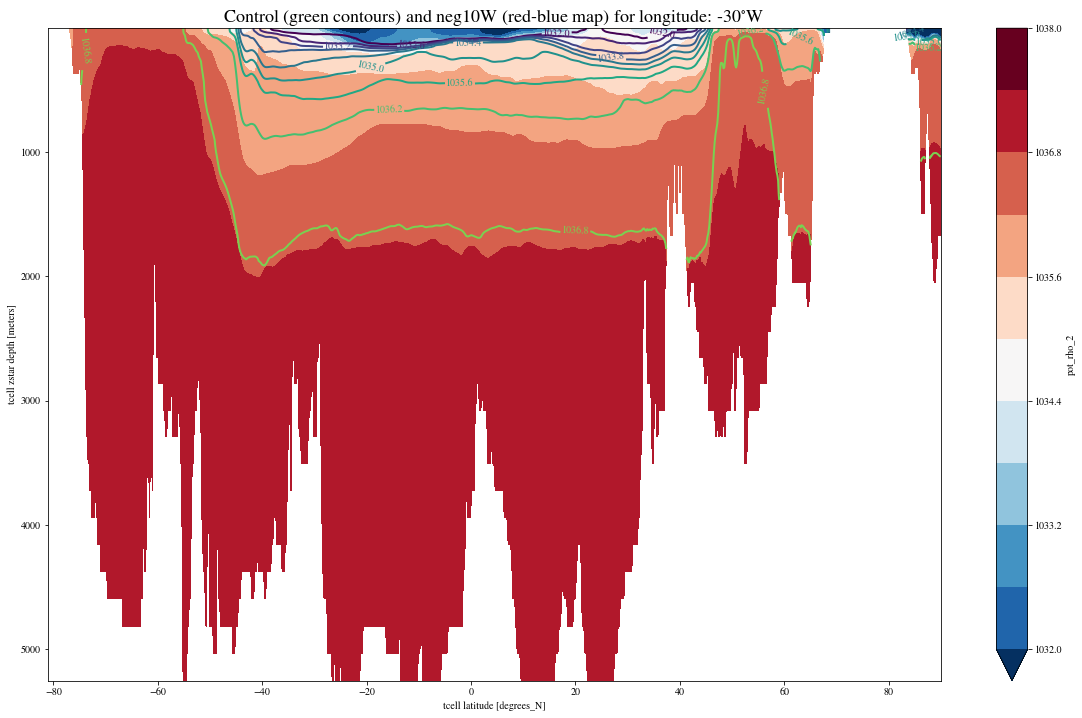

In [9]:
plt.figure(figsize = (20, 12))

cont = potrho_cont.sel(xt_ocean = lon, method = 'nearest').mean('time').plot.contour(levels = np.linspace(1032, 1038, 11))
plt.clabel(cont, inline=True, fontsize=10)

potrho_n10W.sel(xt_ocean = lon, method = 'nearest').mean('time').plot.contourf(levels = np.linspace(1032, 1038, 11), cmap = 'RdBu_r')
plt.gca().invert_yaxis()

plt.title('Control (green contours) and neg10W (red-blue map) for longitude: ' + str(lon) + '$^{\circ}$W', fontsize = 18)

Text(0.5, 1.0, 'Control (green contours) and pos10W (red-blue map) for longitude: -30$^{\\circ}$W')

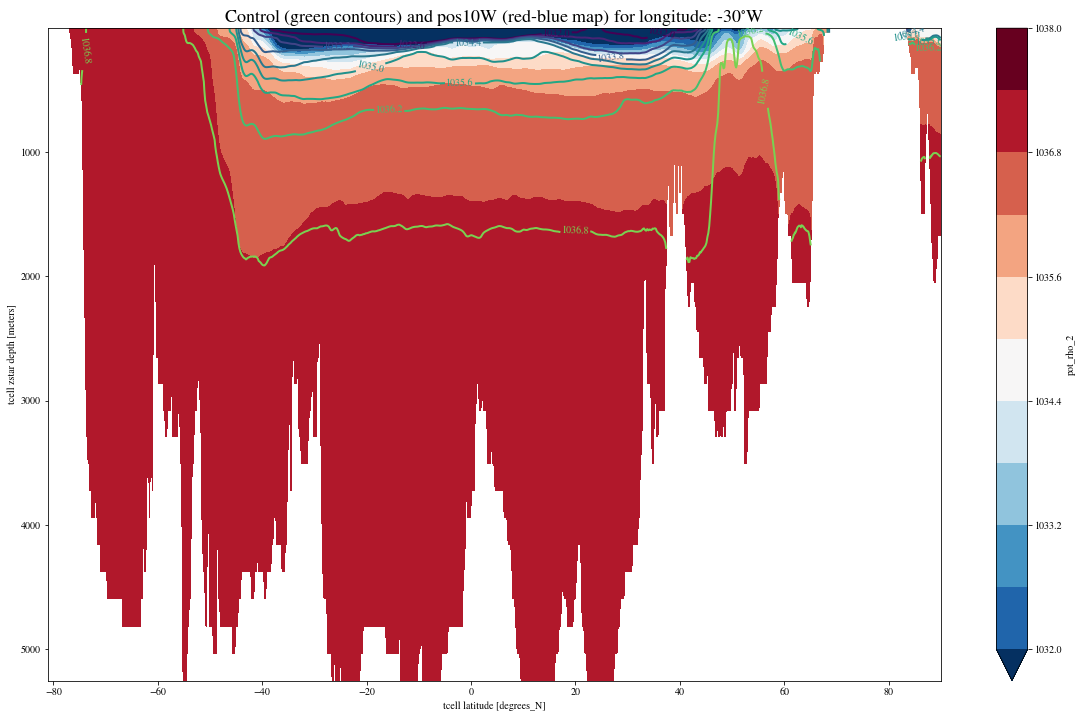

In [10]:
plt.figure(figsize = (20, 12))

cont = potrho_cont.sel(xt_ocean = lon, method = 'nearest').mean('time').plot.contour(levels = np.linspace(1032, 1038, 11))
plt.clabel(cont, inline=True, fontsize=10)

potrho_p10W.sel(xt_ocean = lon, method = 'nearest').mean('time').plot.contourf(levels = np.linspace(1032, 1038, 11), cmap = 'RdBu_r')
plt.gca().invert_yaxis()

plt.title('Control (green contours) and pos10W (red-blue map) for longitude: ' + str(lon) + '$^{\circ}$W', fontsize = 18)

### Longitude = 60$^{\circ}$W

In [11]:
lon = -60

Text(0.5, 1.0, 'Control (green contours) and neg10W (red-blue map) for longitude: -60$^{\\circ}$W')

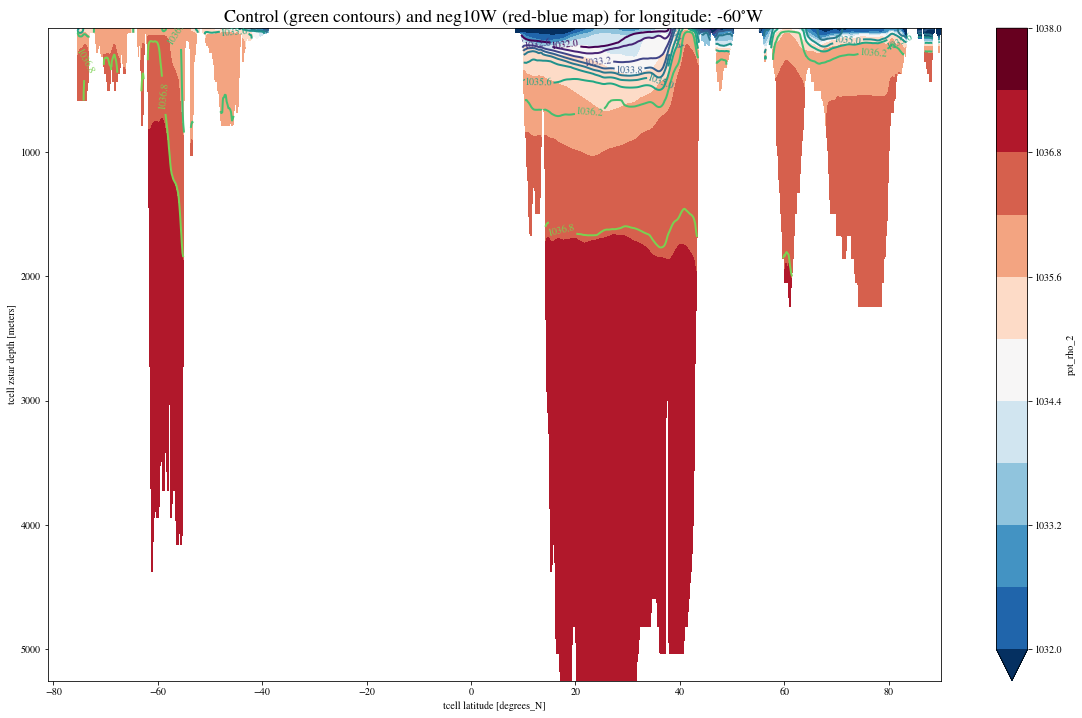

In [12]:
plt.figure(figsize = (20, 12))

cont = potrho_cont.sel(xt_ocean = lon, method = 'nearest').mean('time').plot.contour(levels = np.linspace(1032, 1038, 11))
plt.clabel(cont, inline=True, fontsize=10)

potrho_n10W.sel(xt_ocean = lon, method = 'nearest').mean('time').plot.contourf(levels = np.linspace(1032, 1038, 11), cmap = 'RdBu_r')
plt.gca().invert_yaxis()

plt.title('Control (green contours) and neg10W (red-blue map) for longitude: ' + str(lon) + '$^{\circ}$W', fontsize = 18)

Text(0.5, 1.0, 'Control (green contours) and pos10W (red-blue map) for longitude: -60$^{\\circ}$W')

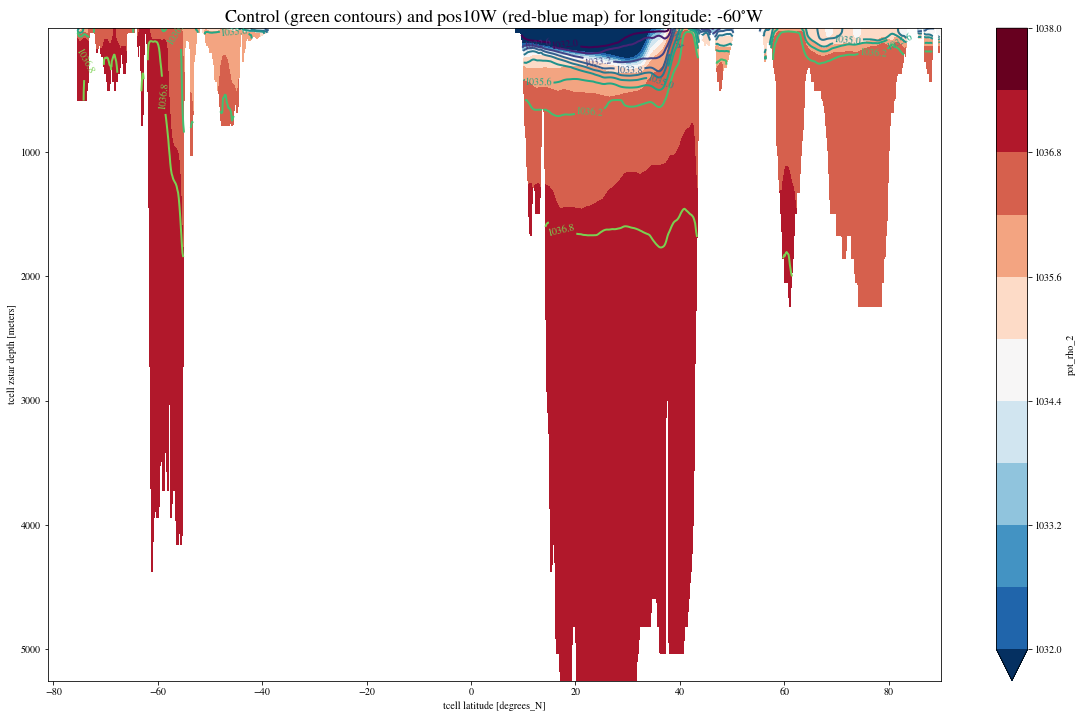

In [13]:
plt.figure(figsize = (20, 12))

cont = potrho_cont.sel(xt_ocean = lon, method = 'nearest').mean('time').plot.contour(levels = np.linspace(1032, 1038, 11))
plt.clabel(cont, inline=True, fontsize=10)

potrho_p10W.sel(xt_ocean = lon, method = 'nearest').mean('time').plot.contourf(levels = np.linspace(1032, 1038, 11), cmap = 'RdBu_r')
plt.gca().invert_yaxis()

plt.title('Control (green contours) and pos10W (red-blue map) for longitude: ' + str(lon) + '$^{\circ}$W', fontsize = 18)

### Longitude = 75$^{\circ}$W

In [14]:
lon = -75

Text(0.5, 1.0, 'Control (green contours) and neg10W (red-blue map) for longitude: -75$^{\\circ}$W')

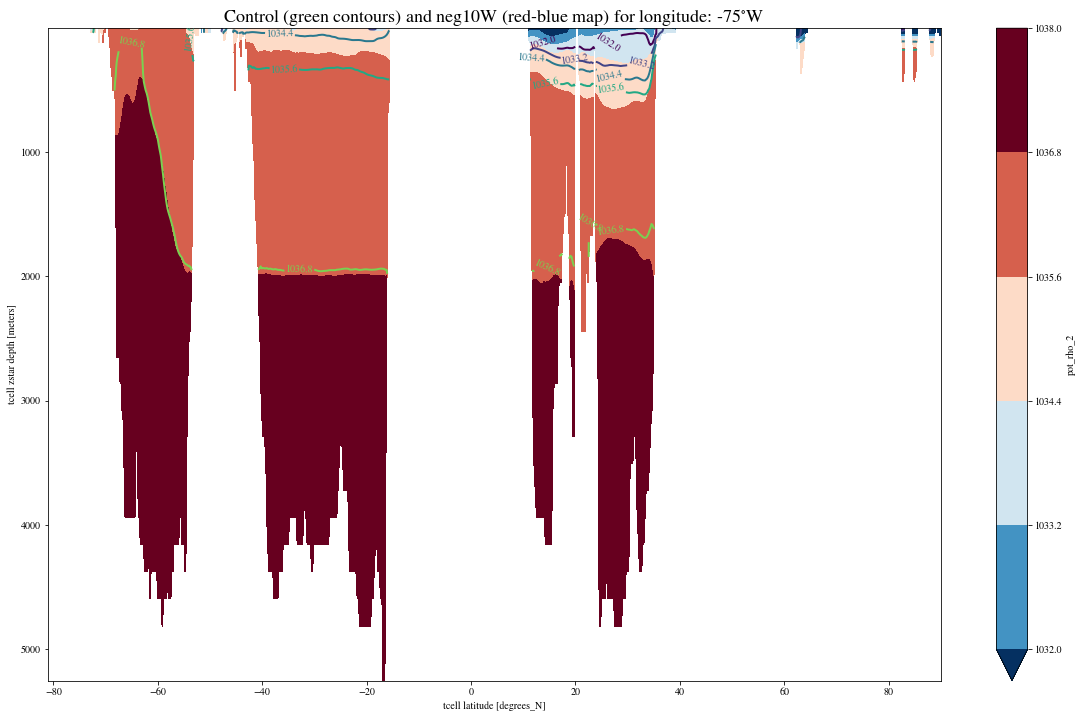

In [15]:
plt.figure(figsize = (20, 12))

cont = potrho_cont.sel(xt_ocean = lon, method = 'nearest').mean('time').plot.contour(levels = np.linspace(1032, 1038, 6))
plt.clabel(cont, inline=True, fontsize=10)

potrho_n10W.sel(xt_ocean = lon, method = 'nearest').mean('time').plot.contourf(levels = np.linspace(1032, 1038, 6), cmap = 'RdBu_r')
plt.gca().invert_yaxis()

plt.title('Control (green contours) and neg10W (red-blue map) for longitude: ' + str(lon) + '$^{\circ}$W', fontsize = 18)

Text(0.5, 1.0, 'Control (green contours) and pos10W (red-blue map) for longitude: -75$^{\\circ}$W')

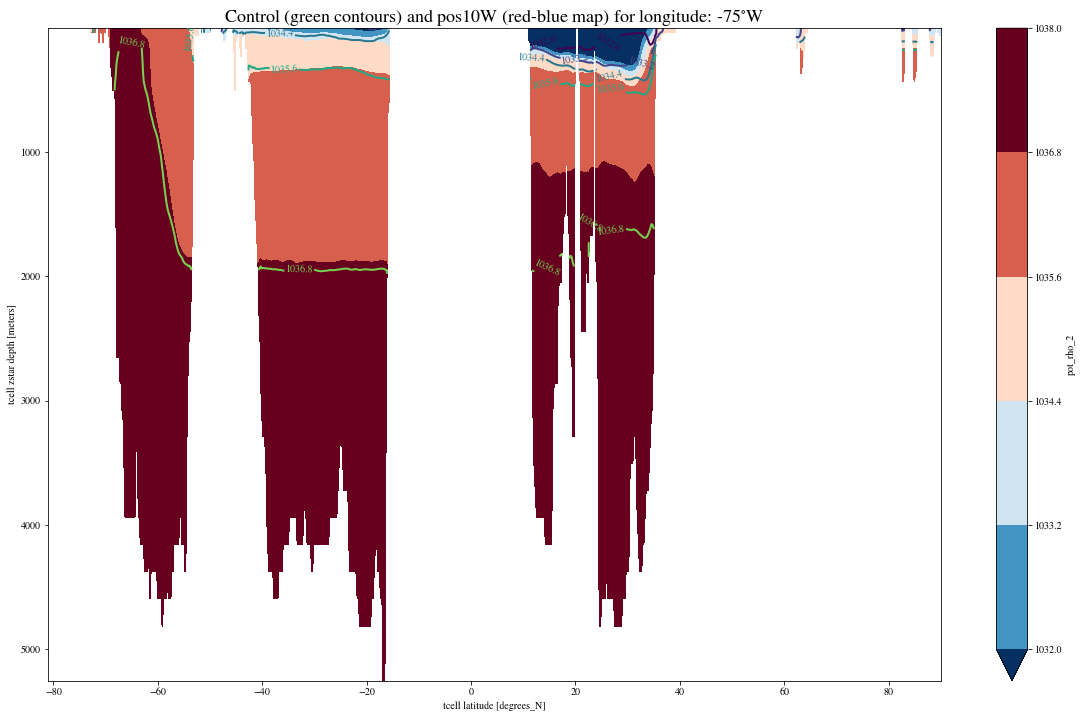

In [16]:
plt.figure(figsize = (20, 12))

cont = potrho_cont.sel(xt_ocean = lon, method = 'nearest').mean('time').plot.contour(levels = np.linspace(1032, 1038, 6))
plt.clabel(cont, inline=True, fontsize=10)

potrho_p10W.sel(xt_ocean = lon, method = 'nearest').mean('time').plot.contourf(levels = np.linspace(1032, 1038, 6), cmap = 'RdBu_r')
plt.gca().invert_yaxis()

plt.title('Control (green contours) and pos10W (red-blue map) for longitude: ' + str(lon) + '$^{\circ}$W', fontsize = 18)